# 회귀(Regression)이란? 여러 변수들 간의 상관 관계를 파악하여 어떤 특정 변수의 값을 다른 변수들의 값을 이용하여 설명, 예측하는 식을 찾는 방법
- 예시: 날씨와 맥주의 데이터 관계, 집의 면적과 집의 가격간의 관계
- 단순/독립: 독립변수의 개수에 따라, 선형/비선형: 선형 결합으로 표현할 수 있는 지 유무, 단변량/다변량: 종속 변수의 개수에 따라

## 단순 선형 회귀: 독립 변수 x와 종속 변수 y의 상호 연관성 정도를 파악하기 위한 분석기법/ y= w0 + w1x1 + w2x2 + ...

### 잔차 제곱 오차 함수: 잔차(=오차)의 제곱합(RSS)이 작을수록 좋은 식
## 회귀에서는 손실함수를 RSS를 씁니다! (분류에서는 다른 것을 사용합니다)


## < 사이킷런에서 최소제곱법으로 단순 선형회귀 수행 >

### 필요한 모듈 import

In [2]:
import pandas as pd
import os

# 1. 맥주 데이터를 활용한 단순 선형 회귀 실습

### 데이터 수집

In [3]:
beer = pd.read_csv('C:/Users/gihun/Python_Data/data/beer.csv')
beer

,beer,temperature
0,45.3,20.5
1,59.3,25.0
2,40.4,10.0
3,38.0,26.9
4,37.0,15.8
5,40.9,4.2
6,60.2,13.5
7,63.3,26.0
8,51.1,23.3
9,44.9,8.5


### 데이터 탐색

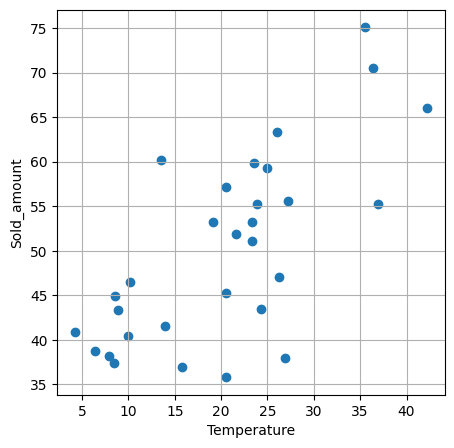

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.scatter(beer.temperature.values, beer.beer.values)
plt.xlabel('Temperature')
plt.ylabel('Sold_amount')
plt.grid()
plt.show()

In [5]:
# 독립 변수, 종속 변수 확인
beer.temperature

0     20.5
1     25.0
2     10.0
3     26.9
4     15.8
5      4.2
6     13.5
7     26.0
8     23.3
9      8.5
10    26.2
11    19.1
12    24.3
13    23.3
14     8.4
15    23.5
16    13.9
17    35.5
18    27.2
19    20.5
20    10.2
21    20.5
22    21.6
23     7.9
24    42.2
25    23.9
26    36.9
27     8.9
28    36.4
29     6.4
Name: temperature, dtype: float64

In [6]:
# 종속 변수 확인, 레코드 수 확인
beer.beer

0     45.3
1     59.3
2     40.4
3     38.0
4     37.0
5     40.9
6     60.2
7     63.3
8     51.1
9     44.9
10    47.0
11    53.2
12    43.5
13    53.2
14    37.4
15    59.9
16    41.5
17    75.1
18    55.6
19    57.2
20    46.5
21    35.8
22    51.9
23    38.2
24    66.0
25    55.3
26    55.3
27    43.3
28    70.5
29    38.8
Name: beer, dtype: float64

###  데이터 준비 - 학습용 / 검증용 데이터 분리

In [7]:
#독립변수, 종속변수 데이터셋 준비
import numpy as np
dataset = np.column_stack([beer.temperature,beer.beer])
# 일일히 하는 과정
X=np.array(beer.temperature).reshape((-1,1))
y=np.array(beer.beer)

In [8]:
# 전체 데이터 중 80%는 학습용, 20%는 검증용으로 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 1)

In [9]:
len(X_train), len(X_test), len(y_train), len(y_test)

(24, 6, 24, 6)

### 모델 구축

In [10]:

#모델 클래스 선택 후 인스턴스 객체 생성
from sklearn.linear_model import LinearRegression
Lr = LinearRegression() # fit_intercept= 절편 값을 계산할 지 말 지-기본 값 true, normalize 데이터 정규화를 할 지 말지- 기본 값 false 

In [11]:
# 학습 수행
leg = Lr.fit(X_train,y_train)

In [12]:
# 계수 및 절편 확인: _속성은 학습을 통해 결정되는 속성
w1 , w0 = leg.coef_, leg.intercept_
print(w1,w0)

[0.69705648] 36.06666541566105


In [13]:
#회귀식
print(f'y={w1[0]:.2f}x + {w0:.5f}')

y=0.70x + 36.06667


In [14]:
# 구축된 모델에서 예측 수행
y_pred = leg.predict(X_test)
y_pred

array([60.81217046, 50.35632326, 54.32954519, 50.35632326, 41.92193985,
       43.17664151])

In [15]:
y_test

array([75.1, 35.8, 47. , 57.2, 37.4, 46.5])

### 모델 성능 평가

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#MSE
mse = mean_squared_error(y_test, y_pred)
#RMSE
rmse = np.sqrt(mse)

In [17]:
#결정계수 R2
r2 = r2_score(y_test, y_pred)
print(mse, rmse, r2)

91.34656925529707 9.557539916489864 0.4845648129795149


### 시각화

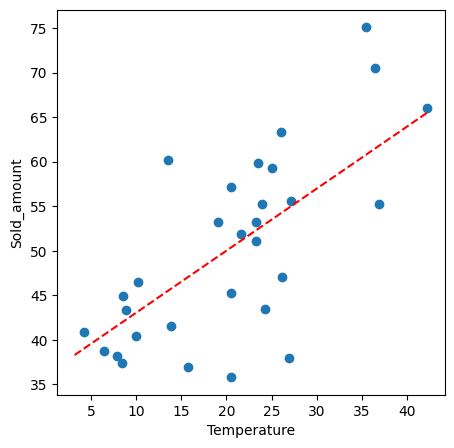

In [18]:
#y = 0.697056X + 36.06 시각화
# 수집한 데이터셋 시각화
plt.figure(figsize=(5,5))
xx = np.arange(beer['temperature'].min()-1, beer['temperature'].max()+1) # 원래 최솟값 -1부터 최댓값 +1 까지 1간격으로 numpy배열 생성
yy = leg.predict(xx.reshape(len(xx),1))
plt.plot(xx,yy,ls='--',color='r')
plt.xlabel('Temperature')
plt.ylabel('Sold_amount')
plt.scatter(beer.temperature.values, beer.beer.values)
plt.show()

# 응용1. 나이, 키의 관계를 회귀 분석

In [19]:
# 필요한 모듈 import 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### 데이터 생성/수집

In [20]:
height = pd.read_csv('C:/Users/gihun/Python_Data/data/age_height.csv')
height

,age(X),height(T)
0,15.425550,170.910131
1,23.008112,160.675599
2,5.002859,129.002066
3,12.558314,159.701396
4,8.668897,155.460589
5,7.308465,140.561344
6,9.656505,153.654664
7,13.639018,159.429396
8,14.919187,164.704239
9,18.470418,169.645276


In [21]:
height.columns

Index(['age(X)', 'height(T)'], dtype='object')

#### 데이터 탐색

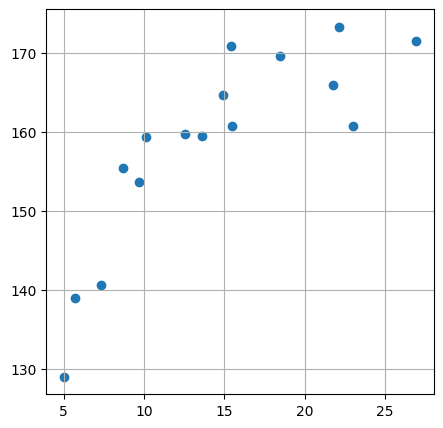

In [22]:
# 데이터 분포 시각화
plt.figure(figsize=(5,5))
plt.scatter(height['age(X)'],height['height(T)'])
plt.grid()
plt.show()

#### 데이터 준비 - 학습용 / 검증용 데이터 분리

In [23]:
X2 = np.array(height['age(X)']).reshape(-1,1) # x는 reshape해서 형식 맞춰줘야 됨.
y2 = np.array(height['height(T)'])
# 전체 데이터 중 80%는 학습용, 20%는 검증용으로 분리
X_train2,X_test2,y_train2,y_test2 = train_test_split(X2,y2,test_size=0.2, random_state=1)
X_train2

array([[ 9.65650528],
       [15.47986286],
       [ 8.66889727],
       [23.00811234],
       [ 5.68468983],
       [15.42555012],
       [21.76168775],
       [18.47041835],
       [14.91918686],
       [10.11130624],
       [22.13048751],
       [ 7.30846487]])

In [24]:
#####모델 구축 및 예측
from sklearn.linear_model import LinearRegression
Lr = LinearRegression()

In [25]:
#모델 객체 생성  및 학습
reg = Lr.fit(X_train2,y_train2)
# 예측 수행
y_pred2 = reg.predict(X_test2)
y_pred2


array([156.85102159, 177.55962487, 158.40575975, 145.98148132])

In [26]:
print(reg.coef_, reg.intercept_)

[1.43863478] 138.78419382830361


In [27]:
#####모델 성능 평가

#MSE : metrcics 모듈의 mean_squared_error() 함수 사용
mse2 = mean_squared_error(y_test2, y_pred2)
#RMSE : numpy의 sqrt() 함수 사용
rmse2 = np.sqrt(mse2)
# MSE

#RMSE


#결정계수 R2
r2 = r2_score(y_test2, y_pred2)
print(mse2, rmse2, r2)
#회귀식
print(f'y= {reg.coef_[0]:.2f}x + {reg.intercept_:.5f}')

83.49484660286434 9.137551455552211 0.6627884107222469
y= 1.44x + 138.78419


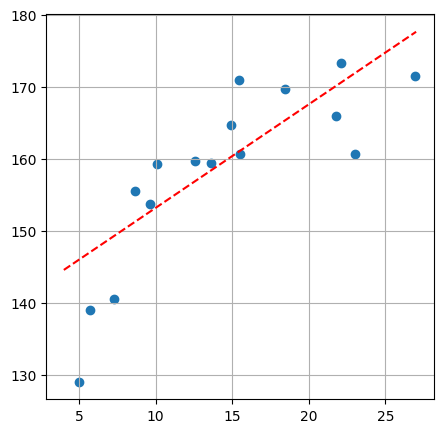

In [28]:
#나이, 키 데이터 실제 데이터 및 회귀식 시각화
plt.figure(figsize=(5,5))
xx2 = np.arange(height['age(X)'].min()-1, height['age(X)'].max()+1)
yy2 = reg.predict(xx2.reshape(len(xx2),1))
plt.plot(xx2,yy2,ls='--',color ='r')
#y = 0.697056X + 36.06 시각화
plt.scatter(X2,y2)
plt.grid()
plt.show()


# < 스탯츠모델에서 단순선형회귀 수행>

In [29]:
#스탯츠모델 import
# lr = sm.OLS(y_train, x_train) -> lr.fit() 이렇게 해야 함 스탯츠모델은/ const = 절편
import statsmodels.api as sm
# 맥주 데이터 
# 데이터 생성
#beer = pd.read_csv

#독립변수, 종속변수 데이터셋 준비
X=np.array(beer.temperature).reshape(-1,1)
y=beer.beer
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_trian = sm.add_constant(X_train)
X_test = sm.add_constant(X_test) # 저렇게 [1, 25] 이렇게 만들어주어서 2차원 배열을 해주어야 함.
X_test

array([[ 1. , 35.5],
       [ 1. , 20.5],
       [ 1. , 26.2],
       [ 1. , 20.5],
       [ 1. ,  8.4],
       [ 1. , 10.2]])

In [30]:
# 스탯츠모델
lr = sm.OLS(y_train, X_train)
reg = lr.fit()

In [31]:
# 성능 평가
print(reg.summary())

                                 OLS Regression Results                                
Dep. Variable:                   beer   R-squared (uncentered):                   0.889
Model:                            OLS   Adj. R-squared (uncentered):              0.884
Method:                 Least Squares   F-statistic:                              184.7
Date:                Tue, 07 Feb 2023   Prob (F-statistic):                    1.77e-12
Time:                        15:07:05   Log-Likelihood:                         -102.10
No. Observations:                  24   AIC:                                      206.2
Df Residuals:                      23   BIC:                                      207.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# 응용2: 농어 무게 예측

In [32]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

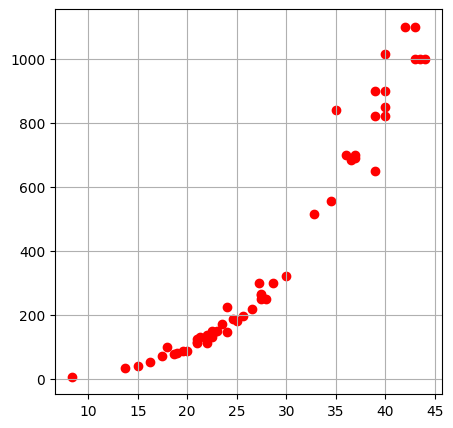

In [33]:
plt.figure(figsize=(5,5))
plt.scatter(perch_length,perch_weight,color='r')
plt.grid()
plt.show()


In [34]:
X = perch_length.reshape(-1,1)
y = perch_weight
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
X_train

array([[ 1. , 34.5],
       [ 1. , 36. ],
       [ 1. , 21. ],
       [ 1. , 16.2],
       [ 1. , 24. ],
       [ 1. , 43. ],
       [ 1. , 28.7],
       [ 1. , 24.6],
       [ 1. , 39. ],
       [ 1. , 43.5],
       [ 1. , 25. ],
       [ 1. , 28. ],
       [ 1. , 21.3],
       [ 1. , 23. ],
       [ 1. , 40. ],
       [ 1. , 27.3],
       [ 1. , 22. ],
       [ 1. , 42. ],
       [ 1. , 27.5],
       [ 1. , 23.5],
       [ 1. , 17.4],
       [ 1. , 22. ],
       [ 1. , 26.5],
       [ 1. , 25.6],
       [ 1. , 40. ],
       [ 1. , 36.5],
       [ 1. , 22. ],
       [ 1. , 44. ],
       [ 1. , 22.5],
       [ 1. , 24. ],
       [ 1. , 18.7],
       [ 1. , 19. ],
       [ 1. , 43. ],
       [ 1. , 13.7],
       [ 1. , 22. ],
       [ 1. ,  8.4],
       [ 1. , 22. ],
       [ 1. , 18. ],
       [ 1. , 21. ],
       [ 1. , 20. ],
       [ 1. , 19.6],
       [ 1. , 21. ],
       [ 1. , 37. ],
       [ 1. , 32.8]])

In [35]:
lr = sm.OLS(y_train, X_train)
reg = lr.fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     504.9
Date:                Tue, 07 Feb 2023   Prob (F-statistic):           4.98e-25
Time:                        15:07:07   Log-Likelihood:                -261.47
No. Observations:                  44   AIC:                             526.9
Df Residuals:                      42   BIC:                             530.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -618.3318     45.075    -13.718      0.000    -709.298    -527.366
x1            35.6311      1.586     22.469      0.000      32.431      38.831
==============================================================================
Omnibus:                       18.277   Durbin-Watson:                   2.127
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.668
Skew:                           1.377   Prob(JB):                     7.25e-06
Kurtosis:                       5.307   Cond. No.                         90.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 응용3: 보스턴 집값 선형 회귀

In [36]:
from sklearn import datasets 
boston=datasets.fetch_openml('boston')

c:\Users\gihun\Python_Data\lib\site-packages\sklearn\datasets\_openml.py:292: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(
c:\Users\gihun\Python_Data\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


### 데이터 수집

In [37]:
#from sklearn.datasets import load_boston
#boston = load_boston()
#boston 이전 버전은 안됨.

### 데이터 탐색

In [38]:
dir(boston)

['DESCR',
 'categories',
 'data',
 'details',
 'feature_names',
 'frame',
 'target',
 'target_names',
 'url']

In [39]:
print(boston.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.
Variables in order:
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10

In [40]:
print(boston.data[:5])

      CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8   
2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0     17.8   
3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0     18.7   
4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0     18.7   

        B  LSTAT  
0  396.90   4.98  
1  396.90   9.14  
2  392.83   4.03  
3  394.63   2.94  
4  396.90   5.33  


In [41]:
print(boston.target[:5])

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64


In [42]:
print(boston.feature_names)
print(boston.target_names)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
['MEDV']


### 데이터 준비

In [43]:
# boston 데이터에서 독립변수(RM), 종속 변수를 각각 골라내고 데이터프레임으로 변환
import pandas as pd
x = boston.data.RM
y = boston.target
print(x)

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, Length: 506, dtype: float64


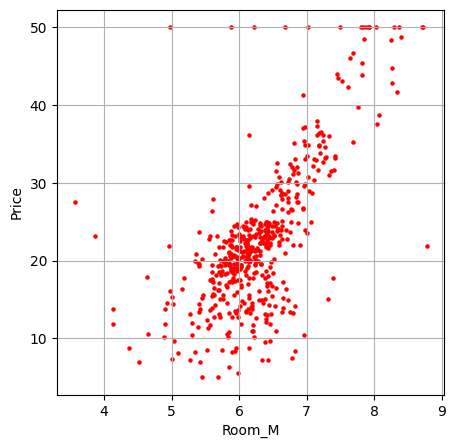

In [44]:
#데이터 탐색
# RM과 MEDV의 관계 시각화
plt.figure(figsize=(5,5))
plt.scatter(x,y,s=5,color='r')
plt.xlabel('Room_M')
plt.ylabel('Price')
plt.grid()
plt.show()

In [45]:
x = np.array(x).reshape((-1,1))
y = np.array(y)
print(y)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

### 학습용/ 검증용 데이터 분리

In [46]:
# 조건 : 학습 7, 검증 3
X_train , X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)
# seed  = 1로 고정
##### 5분 실습 / 결정 계수를 구하라
Lr = LinearRegression()
reg2 = Lr.fit(X_train, y_train)
w1 = reg2.coef_
w0 = reg2.intercept_
print(f'y= {w1[0]:.2f}x + {w0:.2f}')

y= 8.46x + -30.57


In [47]:
y_pred = reg2.predict(X_test)
y_pred

array([27.37898421, 26.08443719, 20.44935016, 19.16326423, 14.79734095,
       23.3430435 , 25.52600514, 20.80471601, 19.78092392, 23.72379262,
       26.54133614, 27.5905115 , 17.91948376, 18.39330489, 20.39012252,
       16.87876949, 25.68676588, 43.25199212, 21.56621426, 11.10830499,
       17.69949538, 17.04799132, 24.99295637, 23.70687044, 22.64923399,
       19.31556388, 21.00778221, 20.31397269, 33.0563767 , 15.03425151,
       25.09448947, 16.85338622, 37.4053778 , 22.31925141, 21.41391461,
       19.56939663, 23.08074966, 29.90038952,  4.44096478, 21.16008186,
       23.01306093, 22.81845582, 25.42447204, 21.56621426, 21.76081936,
       27.16745692, 35.44240454, 19.23941406, 21.05008767, 23.62225952,
       28.48738722, 23.22458822, 23.83378682, 22.89460564, 12.5213073 ,
       24.0537752 , 18.94327585, 21.22777059, 20.1109065 , 39.20759032,
       23.67302607, 25.52600514, 18.05486123, 23.1399773 , 15.22039553,
       28.48738722, 39.96908857, 24.7645069 , 20.27166724, 18.96

In [48]:
r2 = r2_score(y_test,y_pred)
r2

0.6015774471545621

In [59]:
mse = mean_squared_error(y_test, y_pred)
# rmse
rmse = np.sqrt(mse)
print(mse, rmse, r2)

36.51721473083863 6.042947520112898 0.6015774471545621


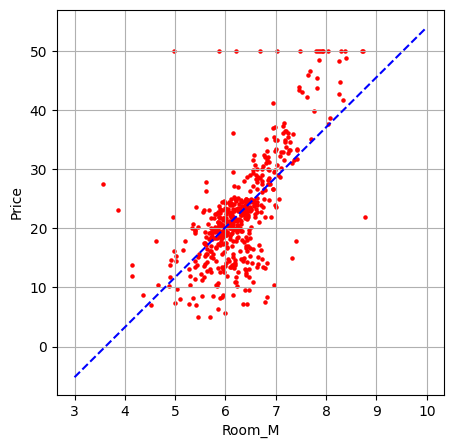

In [67]:
plt.figure(figsize=(5,5))
plt.scatter(boston.data.RM, boston.target,s=5,c='r')
xx = np.linspace(3,10)
yy = reg2.predict(xx.reshape((-1,1)))
plt.plot(xx,yy,ls='--',c='b')
plt.grid()
plt.xlabel('Room_M')
plt.ylabel('Price')
plt.show()

### 모델 구축

### 모델 평가

### 시각화